In [1]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


59.007734644290636
58.98843843382876
60.36982932156279
61.320648651248895
60.47994645994285
61.714337343460954
62.12240520147739
62.35783570728404
61.66781442099263
62.74186385963588
60.475672939183525
59.37328981819041
60.23725843383497
60.29781327903372
58.49430324151718
58.24627858867172
58.38377166825652
58.452634757459904
57.614758803742745
57.07772748358517
56.53314838190636
57.43906230693184
57.53852082273902
57.88319068522635
58.37004747135554
58.15201896204399
59.503581577866605
58.9951371298026
58.114512803075094
60.44960331810436
61.406099157134676
61.165272555063744
62.12374160097558
61.87218039874716
61.36959971097402
62.23780326986256
62.29659100669045
63.17533706624003
62.594502450298556
64.01458386858144
63.1698591148135
62.47019193396631
63.83025764384213
61.23381686202063
62.64212144349581
63.32279131758746
62.25613467776938
60.52218373667331
61.21387795167512
59.88520155528602
59.477771761323424
61.36204714441143
58.33192175990909
60.44355735472094
61.07822325094159


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

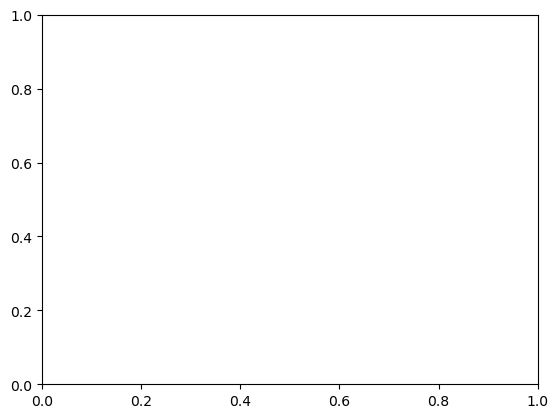

In [34]:
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Given data

# data = pd.read_csv("LAQ.csv")

data = [59.2, 58.6, 57.3, 61.4, 62.6, 60.4, 60.8, 58.2, 61.5, 61.3, 61.1, 61,  60.9, 61.8,
 59.2, 59.1, 62,  55.3, 53.6, 55.1, 53.3, 53.8, 52.1, 50.7, 50.3, 50.6, 49.3, 50,
 50.1, 54.3, 53.9, 47.1, 46.3, 46.6, 45.9, 46.1, 46.2, 46,  45.6, 45.6,45.9, 46,
 45.9, 45.8, 46,  45.8, 45.7, 45.7, 46.1, 46.2, 46.3, 46.5, 46.4, 46.2, 45.9, 46.1,
 46,  46.1, 46.7, 46.9, 47.6, 47.2, 47.9, 49.4, 50.4, 53.3, 53.5, 54.8, 58.7, 58.1,
 57.6, 58.8, 57.5, 56.3, 56.9, 57.5, 59.2, 60.5, 54.2, 58.2, 57.8, 59.4, 62,  61.7,
 59.6, 61.3, 61.1, 58.7, 58, 58.6, 55.9, 56.6, 60.7, 60.3, 60.5, 59.3, 46.3,
    
]



# Number of peaks to add
num_peaks = 5

# Locations and amplitudes of peaks
peak_locations = np.random.choice(len(data), num_peaks, replace=False)
peak_amplitudes = np.random.normal(2, 0.5, num_peaks)  # Adjust the mean and standard deviation as needed

# Add peaks to the data
for i in range(num_peaks):
    data[peak_locations[i]] += peak_amplitudes[i]

# Generate x-values for interpolation
x = np.linspace(0, 1, len(data))

# Perform cubic spline interpolation
cubic_spline = CubicSpline(x, data)

# Number of points to interpolate
num_points = 1000

# Interpolate data
interpolated_data = cubic_spline(np.linspace(0, 1, num_points))

# Add noise to interpolated data
mean = 0
std_dev = 0.7  # Adjust the standard deviation as needed
noisy_interpolated_data = interpolated_data + np.random.normal(mean, std_dev, size=num_points)

# Print noisy interpolated data with peaks
for d in noisy_interpolated_data:
    print(d)

plt.step(np.linspace(0, 1, num_points), d, where='mid')

plt.title('Noisy and Peaky Dataset')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

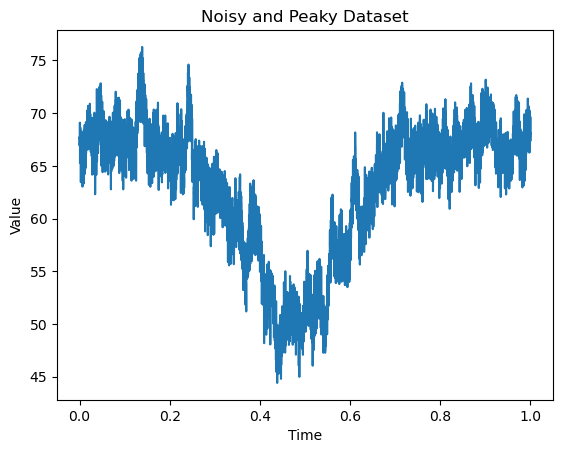

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Given data
data = [
    65.8, 65.1, 66.5, 65.9, 69.6, 67.6, 66.5, 64.6, 67.8, 65.4,
    67.5, 66.1, 68, 70.9, 66.4, 64.9, 67.5, 65.5, 64.9, 64.7,
    64, 64.5, 64.2, 68.9, 62.7, 63.3, 63.5, 61.7, 61.8, 61.1,
    61.2, 60.9, 58.7, 58.4, 56.1, 53.8, 56.1, 57.2, 54.8, 49.6,
    51.7, 49, 46.6, 48.8, 48.1, 49, 46.9, 46.2, 52.9, 49.6, 52.4,
    51, 49.1, 55.3, 55.2, 54.9, 55.5, 56.6, 61.4, 58.8, 59.8,
    59.2, 60, 64.5, 63.4, 65.5, 64.7, 66.4, 67.1, 65.7, 64.8,
    66.3, 65.1, 65, 65, 64.6, 65.6, 65.2, 63.4, 65, 64.4, 66.7,
    68, 68.4, 65.5, 69, 65.9, 66.9, 65.8, 66, 65.2, 64.6, 65.8,
    65.6, 66.8, 66
]

# Number of peaks to add
num_peaks = 40

# Locations and amplitudes of peaks
peak_locations = np.random.choice(len(data), num_peaks, replace=False)
peak_amplitudes = np.random.normal(2, 0.5, num_peaks)  # Adjust the mean and standard deviation as needed

# Add peaks to the data
for i in range(num_peaks):
    data[peak_locations[i]] += peak_amplitudes[i]

# Generate x-values for interpolation
x = np.linspace(0, 1, len(data))

# Perform cubic spline interpolation
cubic_spline = CubicSpline(x, data)

# Number of points to interpolate
num_points = 5000

# Interpolate data
interpolated_data = cubic_spline(np.linspace(0, 1, num_points))

# Add noise to interpolated data
mean = 0.5
std_dev = 1.5  # Adjust the standard deviation as needed
noisy_interpolated_data = interpolated_data + np.random.normal(mean, std_dev, size=num_points)

# Plot noisy interpolated data with peaks
plt.step(np.linspace(0, 1, num_points), noisy_interpolated_data, where='mid')
plt.title('Noisy and Peaky Dataset')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


2024-01-01 14:00:00
<class 'list'> <class 'numpy.ndarray'>


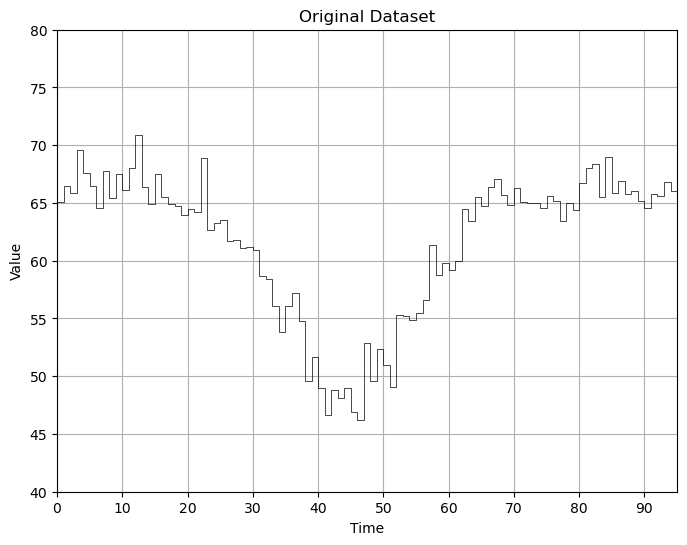

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates




# Given data
original_data = [
    65.8, 65.1, 66.5, 65.9, 69.6, 67.6, 66.5, 64.6, 67.8, 65.4,
    67.5, 66.1, 68, 70.9, 66.4, 64.9, 67.5, 65.5, 64.9, 64.7,
    64, 64.5, 64.2, 68.9, 62.7, 63.3, 63.5, 61.7, 61.8, 61.1,
    61.2, 60.9, 58.7, 58.4, 56.1, 53.8, 56.1, 57.2, 54.8, 49.6,
    51.7, 49, 46.6, 48.8, 48.1, 49, 46.9, 46.2, 52.9, 49.6, 52.4,
    51, 49.1, 55.3, 55.2, 54.9, 55.5, 56.6, 61.4, 58.8, 59.8,
    59.2, 60, 64.5, 63.4, 65.5, 64.7, 66.4, 67.1, 65.7, 64.8,
    66.3, 65.1, 65, 65, 64.6, 65.6, 65.2, 63.4, 65, 64.4, 66.7,
    68, 68.4, 65.5, 69, 65.9, 66.9, 65.8, 66, 65.2, 64.6, 65.8,
    65.6, 66.8, 66
]

# Generate x-values for original data
x_original = np.arange(len(original_data))

start_time = datetime(2024, 1, 1, 14, 0, 0)
print(start_time)

# Generate datetime objects for time axis with a tick every 2 hours
time_values = [start_time + timedelta(hours=i*2) for i in range(len(original_data))]

hoursl = [dt.hour for dt in time_values]
print(type(hoursl), type(x_original))

# Convert numbers to strings
strings = [str(num) for num in hoursl]

# Convert list of strings to NumPy array
hl = np.array(strings)

hl = [14, 16, 18, 20, 22, 0,2, 4, 6, 8, 10, 12]

# Plot original data
plt.figure(figsize=(8, 6))
plt.step(x_original, original_data,color='black', linewidth=0.5)
plt.title('Original Dataset')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(np.arange(0, 120, step=10))
plt.ylim(40, 80)
plt.xlim(0, 95)
# plt.gca().set_xticks(f'{hl}')


# plt.xticks( hl)


plt.grid(True)

plt.show()
